# Machine Learning Topics: Feature Engineering, Cross Validation, and Bias vs Variance

## Goals

- <b>Feature engineering</b>: transform a dirty dataset into a machine learning ready dataset.
- Learn the importance of <b>cross validation</b>: why and how it's used.
- The <b>bias vs variance</b> trade-off, aka the eternal dilemma of machine learning.
- Make and interpret learning and validation curves

### Feature Engineering.
["Feature engineering is the process of using domain knowledge of the data to create features 
that make machine learning algorithms work"](https://en.wikipedia.org/wiki/Feature_engineering)

We are creating new features from old ones.
<br><br>
Our job: transform the [titanic dataset](https://www.kaggle.com/c/titanic) into one that can be used for machine learning, specifically predicting whether or not a passenger survives the titanic.

In [204]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier


In [134]:
#load in the the dataset

path = "../../data/titanic.csv"

titanic = pd.read_csv(path)

#lowercase column names
titanic.columns = titanic.columns.str.lower()


#Set passengerid column as index
titanic.set_index('passengerid', inplace=True)


#view data
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

<b>Data dictionary:</b>

PassengerID: A column added by Kaggle to identify each row and make submissions easier

Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

Pclass:	The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

Sex: The passenger’s sex

Age: The passenger’s age in years

SibSp: The number of siblings or spouses the passenger had aboard the Titanic

Parch: The number of parents or children the passenger had aboard the Titanic

Ticket: The passenger’s ticket number

Fare: The fare the passenger paid

Cabin: The passenger’s cabin number

Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

Inspection time.

In [136]:
#Call .info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We have three columns will null values, what should we do with them?

First up: fixing the age column.

We're not going to drop it because we don't want to reduce the size of the dataset by a significant amount. We're going to use a technique called "[imputation](https://machinelearningmastery.com/handle-missing-data-python/)" to get around this issue.

In [137]:
#Fill in the null values of the age column using the median age.
titanic.age.fillna(titanic.age.median(), inplace=True)

#Confirm there are no nulls
titanic.age.isnull().sum()

0

In [138]:
titanic.age

passengerid
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6      28.0
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18     28.0
19     31.0
20     28.0
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27     28.0
28     19.0
29     28.0
30     28.0
       ... 
862    21.0
863    48.0
864    28.0
865    24.0
866    42.0
867    27.0
868    31.0
869    28.0
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879    28.0
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: age, Length: 891, dtype: float64

In [139]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

What about cabin? It gets the drop

In [140]:
#Look at unique values
titanic.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [141]:
#Drop the cabin column from the data

titanic.drop('cabin', axis=1, inplace=True)

Lastly, the embarked column.

In [142]:
#View uniques
titanic.embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

What should we do?

Solution is to drop rows that null because there are only two null rows.

In [143]:
#Check to see which columns has nulls
titanic.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

In [144]:
#drop rows with null values
titanic[titanic.embarked.isnull()]


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
passengerid,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [145]:
# titanic.embarked.dropna(inplace=True)

In [146]:
titanic.dropna(subset=['embarked'], inplace=True)

In [147]:
titanic[titanic.embarked.isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
passengerid,,,,,,,,,,


In [148]:
titanic.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Let's at the details of the data again.

In [149]:
#Call .info() on titanic
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
survived    889 non-null int64
pclass      889 non-null int64
name        889 non-null object
sex         889 non-null object
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
ticket      889 non-null object
fare        889 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


We've dealt with the missing data issue, now we need to handle the text data. Our objective here is turn words into numbers.

What do you think that means?

In [150]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
passengerid,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


First order of business, deciding which of the string/object columns to keep and drop.

In [151]:
#List of object dtype columns
object_columns = ["name", "ticket"]

#Look at titanic data with just the columns in object_columns
titanic[object_columns].head()


,name,ticket
passengerid,,
1,"Braund, Mr. Owen Harris",A/5 21171
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
3,"Heikkinen, Miss. Laina",STON/O2. 3101282
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
5,"Allen, Mr. William Henry",373450


Which ones do we drop?

Name and ticket get the ax

In [152]:
#Drop name and ticket columns from the data
titanic.drop(columns=object_columns, axis=1, inplace=True)


#View data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


At this point, we now have two string columns in sex and embarked. Let's turn them in numbers by making dummy variables.
<br><br>
1. Convert male to 0 and female to 1 in the sex column.
2. Make dummy variables from the embarked column.

In [153]:
#Make a dictionary where the keys are male and female and the values are 0 and 1
gender_dict = {"male":0,"female":1}


#Map dictionary onto the sex column and reassign it to sex.

titanic["sex"] = titanic.sex.map(gender_dict)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S


In [154]:
#Use pd.get_dummies to make dummy variables from the embarked column

dummy = pd.get_dummies(titanic.embarked, prefix='emb')

#Pass embarked column, then set prefix to "emb" and call .head()
dummy.head()

,emb_C,emb_Q,emb_S
passengerid,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


What's the issue here?

Curse of dimensionality!

We don't need all three columns. We didn't make a separate column for male and female, so why should we do that for C, Q, S

In [155]:
#Make dummy variables from the embarked column, but this time set drop_first = True
#Assign dummies to variable called emb_dums

emb_dums  = pd.get_dummies(titanic.embarked, prefix='emb', drop_first=True)

#Look at emb_dums
emb_dums.head()

,emb_Q,emb_S
passengerid,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


Combine this dataframe of dummy variables with our original dataset.

In [156]:
#1. Drop embarked column
titanic.drop('embarked', axis=1, inplace=True)

#2. Concatenate the titanic and emb_dums dataframes and overwrite titanic variable
titanic = pd.concat([titanic, emb_dums], axis=1)

#3. View new concatenated dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,emb_Q,emb_S
passengerid,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,1
2,1,1,1,38.0,1,0,71.2833,0,0
3,1,3,1,26.0,0,0,7.9250,0,1
4,1,1,1,35.0,1,0,53.1000,0,1
5,0,3,0,35.0,0,0,8.0500,0,1


In [157]:
#Check to see if all variables are numeric
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
emb_Q         uint8
emb_S         uint8
dtype: object

In [158]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
emb_Q       0
emb_S       0
dtype: int64

Great! Our dataset is now ready for machine learning.
<br><br>

But time for a quick exercise. Write a function to that takes an uncleaned version of the titantic dataset, applys the feature engineering techniques we used above, and outputs a clean machine learning ready dataset.

In [159]:
#Function goes here
def titanic_fe(df):
    
    return df


In [160]:
#Test to see if function on reimported titanic dataset

titanic2 = pd.read_csv("../data/titanic.csv")

#Pass in titanic2 into titanti_fe function


FileNotFoundError: File b'../data/titanic.csv' does not exist

We're ready to do some machine learning but first let's discuss the null accuracy
<br><br>
The null accuracy aka the bench mark of our model's performance. It is the maximum percentage of the target variable distribution. 

In [162]:
#Call .value_counts(normalize=True) on survived column

titanic.survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: survived, dtype: float64

Our null accuracy is 61.75%. That means we have to create a model that classifies the data at a better rate than 61.75%.

If we didn't build a model and just said everyone died, then we'd be 61.75% without even going through the trouble of building a model.

## Train/test sets and cross validation. 

In [336]:
#Import train_test_split and cross_val_score functions

from sklearn.cross_validation import train_test_split, cross_val_score

We are going to split our titanic dataset into two sets: training and testing.

In [165]:
#First extract features and target variables

X = titanic.drop('survived', axis=1)
y = titanic.survived

#Input X and y into the train_test_split function, set test_size to .25, random_state = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

- X_train = The features of the data we use to fit the model

- X_test = The features of the data we use to make and test predictions with

- y_train = The target variable of the data we use to fit the model

- y_test = The target variable of the data we use to make and test predicitions with

In [177]:
#Fit a decision tree model on X_train and y_train. Do not specify max_depth
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Evaluate the model by scoring the X_train and y_train
model.score(X_train, y_train)

0.984984984984985

Yay! We got a high score! Or did we????

In [178]:
#Evaluate the model on the test set
model.score(X_test, y_test)


0.7757847533632287

<b>Huge drop in accuracy score. How come?</b>

Let's bring back to the model plotting function for the purpose of visualizing an overfit model against a test set.

In [362]:
#Make some fake data again
from sklearn.datasets import make_classification

#Generate fake data that is 400 x 2.
data = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, random_state=34, class_sep=0.2)

type(data)

tuple

In [338]:
len(data)

2

In [339]:
type(data[0])

numpy.ndarray

In [340]:
data[0].shape

(400, 2)

In [341]:
len(data[0])

400

In [342]:
type(data[1])

numpy.ndarray

In [343]:
data[1].shape

(400,)

In [344]:
len(data[1])

400

In [363]:
#Assign features to XX
XX = data[0]

#Assign target variable to yy
yy = data[1]


In [346]:
XX.shape

(400, 2)

In [347]:
yy.shape

(400,)

In [348]:
type(yy)

numpy.ndarray

In [349]:
type(XX[:,0])

numpy.ndarray

In [350]:
type(XX[:,1])

numpy.ndarray

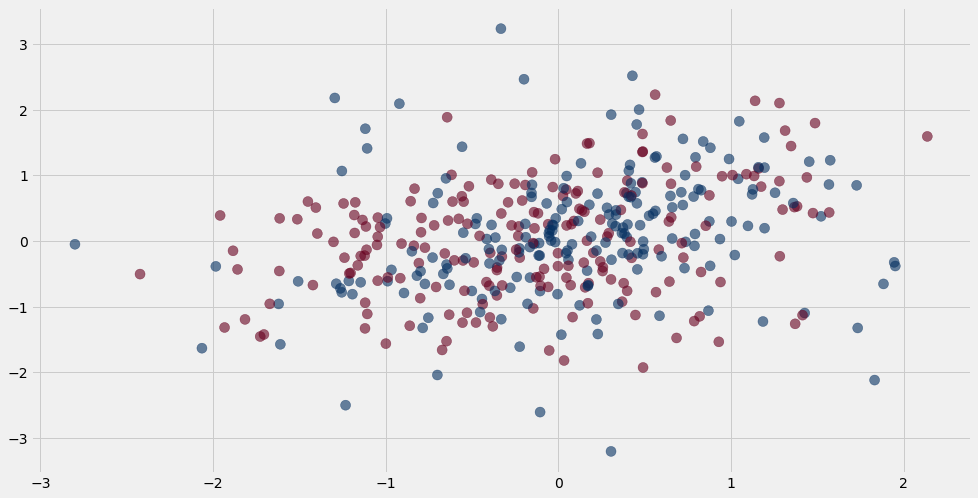

In [364]:
#Set style and size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

#Plot features and use to yy to color-encode,
plt.scatter(XX[:,0], XX[:,1], c=yy, s=100, alpha=0.6, cmap="RdBu")
# plt.scatter(XX[:,0], XX[:,1], c= yy, s =100, alpha=0.6, cmap = "RdBu")

In [367]:
#Train test split on XX and yy
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.33, random_state=10)

#fit model on the training set 
model2 = DecisionTreeClassifier()
model2.fit(XX_train, yy_train)

#Evaluate model on training data
model2.score(XX_train, yy_train)

1.0

In [368]:
model2.score(XX_test, yy_test)

0.5151515151515151

Yay! Perfect model!

In [353]:
#Load in plot_decision_boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max()
    X_min = X.min()
    xticks = np.linspace(X_min, X_max, 100)
    yticks = np.linspace(X_min, X_max, 100)
    xx, yy = np.meshgrid(xticks, yticks)
#     print(xx.shape)
#     print(yy.shape)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     print(type(ZZ))
    Z = ZZ >=0.5
#     print(Z.shape)
    Z = Z.reshape(xx.shape)
#     ZZ = ZZ.reshape(xx.shape)
#     print(Z.shape)
    plt.rcParams['figure.figsize']=(10,7)
#     plt.figure(figsize=(10,7))
    fig, ax = plt.subplots()
    
#     plt.subplot(2,1,1)
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6, s=50, cmap="RdBu")
#     plt.title("subplot with ZZ ")

#     plt.subplot(2,1,2)
#     ax = plt.gca()
#     plt.title("subplot with Z")
#     ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.3)
#     plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6, s=50, cmap="RdBu")
    


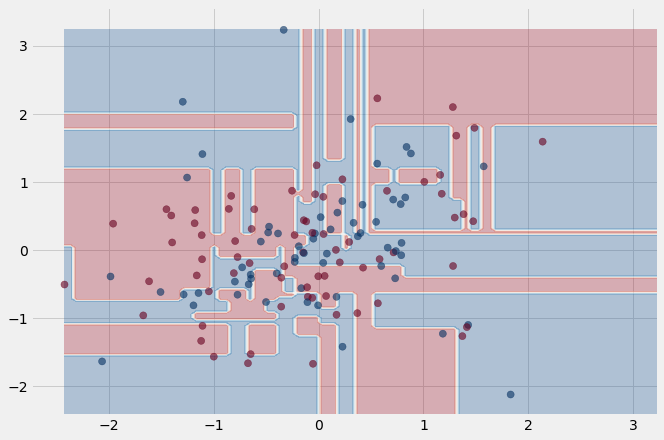

In [354]:
#Visualize the model and the testing data
plot_decision_boundary(model2, XX_test, yy_test)

#Pass in pre-trained model that was trained on the training set
#Pass in the testing data.


How does that look to you? Where in the plot is the model overfit?

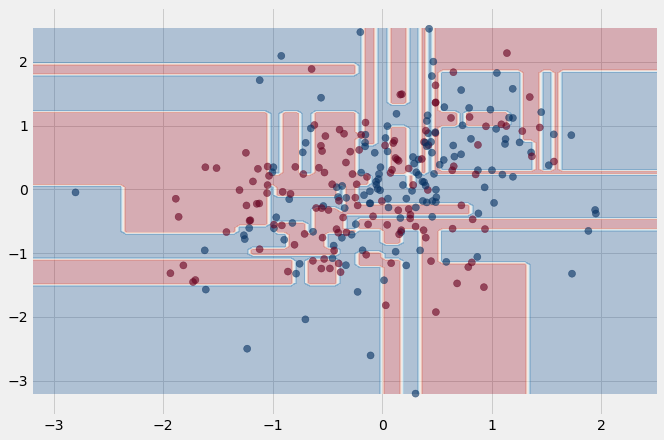

In [355]:
plot_decision_boundary(model2, XX_train, yy_train)

Let's check to see how well the model classifies the testing data

In [356]:
#Evaluate model on testing data
model2.score(XX_test, yy_test)

0.5378787878787878

Let's try that whole process again to see if we get different scores

<br><br>
Run this code several times and observe the changes in the testing score

In [385]:
#Different train/test split but with no random_state set
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = .25)

#Fit model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)

print ("The training score is {:.3f} percent".format(training_score*100))

testing_score = model.score(X_test, y_test)
print ("The testing score is {:.3f}".format(testing_score*100))

The training score is 98.048 percent
The testing score is 78.924


In [417]:
#Lets make this a for loop

#Intialize list that we'll use for our testing scores
testscorelist = []

#Iterate over range 10
for x in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    testscorelist.append(model.score(X_test, y_test))

testscorelist
np.mean(testscorelist)

0.789237668161435

### Cross Validation
<br><br>

"Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set." 

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

<br><br>



<b>K-Fold Cross Validation</b>
![Image](https://i.stack.imgur.com/1fXzJ.png)

<br><br>
"[In K Fold cross validation](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f), the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value."

Let's use cross_val_score function to perform KFold cross validation five times.

In [418]:
#Call cross_val_score, input empty DT model, X, y, set cv = 5 and scoring = accuracy
cv_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy")

#Call cv_scores
cv_scores

array([0.73595506, 0.78089888, 0.79775281, 0.74157303, 0.83615819])

We see theres a degree of variance in the output, which makes deriving the mean crucial.

In [419]:
#Whats the average score
np.mean(cv_scores)

0.7784675934742589

<b>Class exercise:</b>

Test to see the relationship between max_depth and the average cv_score. What happens when you increase or decrease max_depth. 

Whats you're done playing around with that, then make a line plot of depth values from 1 - 20 and the average cross validated score for each corresponding depth value.

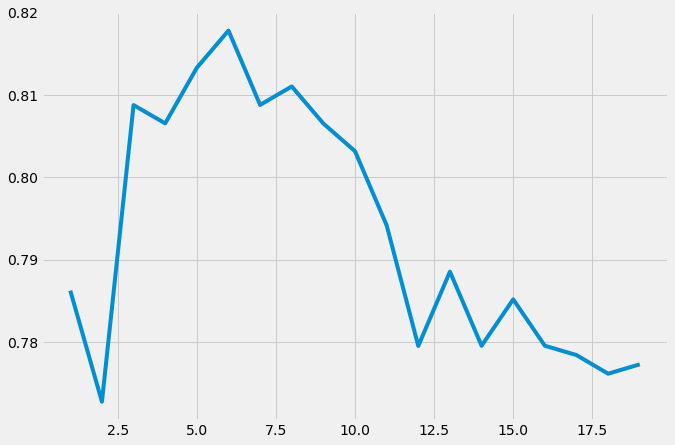

In [425]:
#Answer

cv_scores = []
depths = range(1,20)

for depth in depths:
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=depth), X, y, cv=5, scoring="accuracy").mean()
    cv_scores.append(cv_score)
    
plt.plot(depths, cv_scores)


What is the best depth value?

Train a model with the best depth value and evaluate it on a test set

In [439]:
#Train and test
X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = .25,
                                                   random_state = 42)
#Fit model with depth 6 and random_state = 42
model3 = DecisionTreeClassifier(max_depth=6)
model3.fit(X_train, y_train)

#Score model on test set
testscore = model3.score(X_test, y_test)

print ("The test score is {:.3f} percent".format(testscore*100))

The test score is 81.166 percent


How does that compare to the null accuracy?

In [445]:
#Subtract null accuracy from testscore

testscore - y_test.value_counts(normalize=True).max()

0.179372197309417

Not too bad.

Time to make a confusion matrix

In [446]:
#Imports confusion_matrix and accuracy score funcions

from sklearn.metrics import confusion_matrix, accuracy_score

In [448]:
#Calculate accuracy_score using sklearn


#Make predictions on test set
preds = model3.predict(X_test)

#Call accuracy_score on y_test and preds
accuracy_score(y_test, preds)

0.8116591928251121

In [449]:
#Pass in y_test and preds into confusion_matrix function
confusion_matrix(y_test, preds)

array([[124,  17],
       [ 25,  57]])

accuracy score = correct/total = (124+57)/(124+17+25+57)

The best depth is one that is not too small but not too large.

We need to find the depth that strikes the right balance between <b>bias</b> and <b>variance</b>

### Bias vs Variance
<br><br>
<b>Bias:</b> The simplifying assumptions made by the model to make the target function easier to approximate.

<b>Variance:</b> The amount that the estimate of the target function will change given different training data.

From: https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/
<br><br>
[Legendary data science blog post](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<b>Bias error:</b> The difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Bias measures how far off in general these models' predictions are from the correct value.

<b>Variance error:</b> The error due to variance is taken as the variability of a model prediction for a given data point. Imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.

Graphic illustration of bias vs variance:

![b v v](https://i.stack.imgur.com/r7QFy.png)

Credit: Scott Fortmann-Roe

What do you see here? How would you interpret this graphic?

<b>Depicting bias vs variance with validation and learning curves</b>

Validation Curve:

![Lc](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

<br><br>
Learning Curve:
![lc](https://chrisalbon.com/images/machine_learning_flashcards/Learning_Curve_print.png)
<br><br>
["Graph that compares the performance of a model on training and testing data over a varying number of training instances"](http://www.ritchieng.com/machinelearning-learning-curve/)

Graph 1: Plot validation curve of model complexity versus error rates for training and test sets

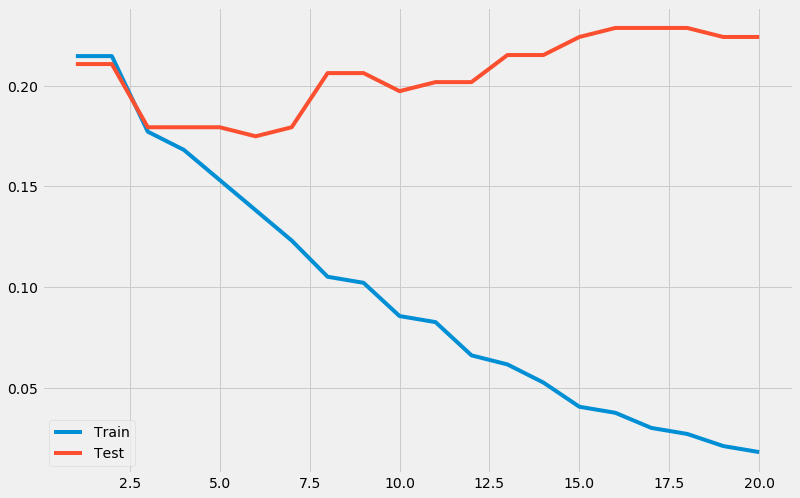

In [456]:
#1. Train test split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = .25,
                                                    random_state = 38)

#2. Initialize lists of errors for train and test sets

train_errors = []
test_errors = []

#3. Set range of depth values from 1 to 20
depths = range(1,21)
#4a. Iterate over depth values.
#4b. Fit a DT model for each depth model.
#4c. Evaluate the model on both the train and test sets.
#4d. Append scores to train_errors and test_errors

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error = 1 - model.score(X_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    
#5. Make two line plots. Plot depths vs train_errors and plot depths vs test_errors
#Give them different colors and labels
plt.figure(figsize=(12,8))
plt.plot(depths, train_errors, label = "Train")
plt.plot(depths, test_errors, label= "Test")
plt.legend()


Link to validation plot code from Chris Albon: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/

Graph 2: Plot learning curve of training sizes vs training and testing errors

In [465]:
#Credit Chris Albon

#1. Import learning_curve from sklearn
from sklearn.model_selection import learning_curve

#2. Create CV training and test scores for various training set sizes
#Use max_depth = 5 for DT model
model4 = DecisionTreeClassifier(max_depth=5)
training_sizes, training_scores, testing_scores = learning_curve(model4, 
                                                              X, 
                                                              y, 
                                                              cv=5, 
                                                              scoring="accuracy", 
                                                              train_sizes=np.linspace(0.01, 1.0, 30))

training_sizes, training_scores, testing_scores


(array([  7,  31,  55,  79, 104, 128, 152, 177, 201, 225, 249, 274, 298,
        322, 346, 371, 395, 419, 444, 468, 492, 516, 541, 565, 589, 613,
        638, 662, 686, 711]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 0.96774194, 1.        ],
        [0.98181818, 0.98181818, 0.98181818, 0.98181818, 0.98181818],
        [0.98734177, 0.91139241, 0.91139241, 0.91139241, 0.91139241],
        [0.95192308, 0.92307692, 0.92307692, 0.92307692, 0.92307692],
        [0.859375  , 0.90625   , 0.90625   , 0.90625   , 0.90625   ],
        [0.88157895, 0.875     , 0.875     , 0.875     , 0.875     ],
        [0.9039548 , 0.88135593, 0.89265537, 0.89265537, 0.89265537],
        [0.88059701, 0.88557214, 0.89054726, 0.89054726, 0.89054726],
        [0.88      , 0.85777778, 0.87555556, 0.87555556, 0.87555556],
        [0.8875502 , 0.87550201, 0.87148594, 0.87148594, 0.87148594],
        [0.87226277, 0.87591241, 0.83941606, 0.8394160

In [467]:
training_scores.shape, testing_scores.shape

((30, 5), (30, 5))

In [471]:
#3.Train and test_scores are 30x5. We need to compute average of each 5-fold cv
train_scores = training_scores.mean(axis=1)
test_scores = testing_scores.mean(axis=1)


train_scores, test_scores

(array([1.        , 0.99354839, 0.98181818, 0.92658228, 0.92884615,
        0.896875  , 0.87631579, 0.89265537, 0.88756219, 0.87288889,
        0.87550201, 0.85328467, 0.85302013, 0.85590062, 0.86069364,
        0.86253369, 0.85974684, 0.85775656, 0.85855856, 0.85213675,
        0.85081301, 0.85387597, 0.85619224, 0.85522124, 0.85432937,
        0.85840131, 0.85423197, 0.84682779, 0.84548105, 0.85175809]),
 array([0.74919698, 0.68164794, 0.6895512 , 0.71096299, 0.73008951,
        0.68388244, 0.78291754, 0.75590681, 0.76601917, 0.79868596,
        0.81215641, 0.79194439, 0.78293658, 0.79080175, 0.78631372,
        0.79868596, 0.79869231, 0.80543389, 0.79419793, 0.80768108,
        0.8020758 , 0.79645147, 0.79758776, 0.80208849, 0.80319304,
        0.79980956, 0.81558433, 0.80547197, 0.81107091, 0.80994731]))

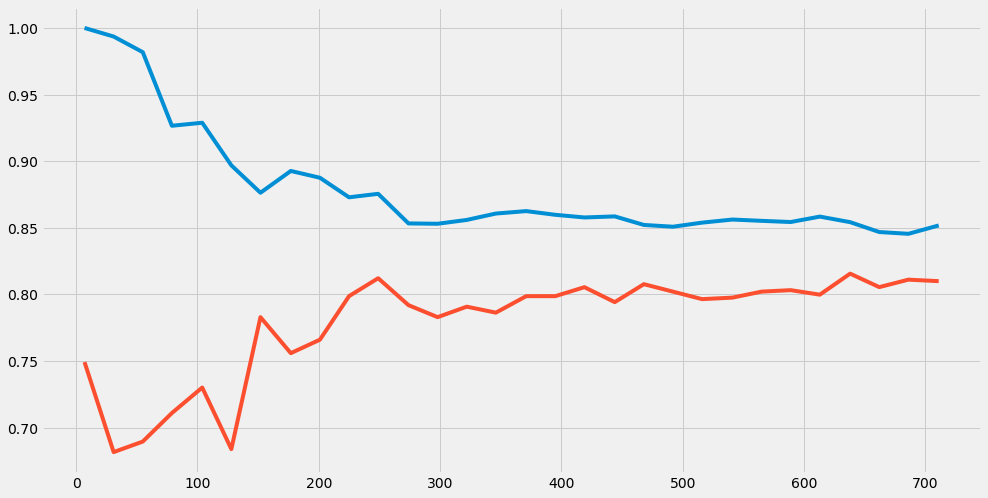

In [474]:

#4. Draw lines
plt.figure(figsize=(15,8))
plt.plot(training_sizes, train_scores)
plt.plot(training_sizes, test_scores)

#5. Create plot


Bonus!!
<br><br>
Let's see the most important features and visualize the decision tree

In [483]:
#Fit DT model on X and y with max_depth 4

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [484]:
#Call .feature_importances
dt.feature_importances_

array([0.20768773, 0.59504915, 0.07483298, 0.04294254, 0.00792785,
       0.07155975, 0.        , 0.        ])

In [493]:
#Lets put that in a dataframe
fi = pd.DataFrame(X.columns, columns=['feature'])
fi['imp']=dt.feature_importances_
fi.sort_values(by='imp', ascending=False)

,feature,imp
1,sex,0.595049
0,pclass,0.207688
2,age,0.074833
5,fare,0.071560
3,sibsp,0.042943
4,parch,0.007928
6,emb_Q,0.000000
7,emb_S,0.000000


In [ ]:
#Sort it



Visualize the tree!

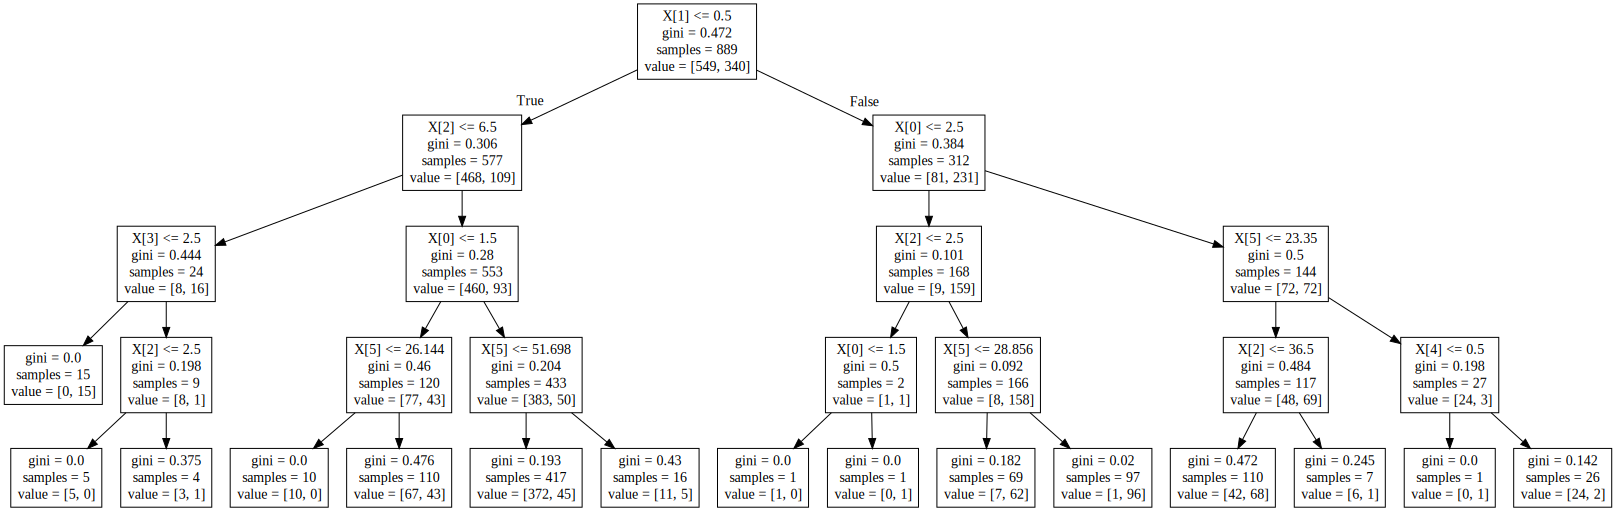

In [507]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file='titanic2.dot') 
with open('titanic2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Class work 

For the rest of class, work on improving your model as much as possible. 

- See what happens when you drop different features
- Try different combinations of them
- Try making pclass into a dummy variables instead of a continuous one
- Make predictions of "fake passengers". Input a bunch of features to see what happens.
- Once you've made the best possible model, make some more validation and learning curves.
- You're also welcome to try the iris dataset or the churn rate dataset as well or make your own data with sklearn.

### Resources:

Bias vs variance:

https://ml.berkeley.edu/blog/2017/07/13/tutorial-4/

https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

http://www.machinelearningtutorial.net/2017/01/26/the-bias-variance-tradeoff/

https://followthedata.wordpress.com/2012/06/02/practical-advice-for-machine-learning-bias-variance/


<br><br>
Cross validation:

https://stats.stackexchange.com/questions/1826/cross-validation-in-plain-english

https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

https://www.openml.org/a/estimation-procedures/1


<br><br>
Titanic dataset projects:

https://www.kaggle.com/maielld1/titanic-dataquest-tutorial

https://github.com/agconti/kaggle-titanic

https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html